# IMPORT LIBRARY

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Biar gada muncul notif warning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
#MUSLIADII
#memanggil data dari direktori D
datahewan = pd.read_csv('D:/All Data I Have/datahewan.csv')
datahewan

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


- Data yang dipanggil memiliki 871 baris dan 7 kolom

# DATA UNDERSTANDING

In [3]:
#Musliadii
#melihat 5 baris data teratas
datahewan.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [4]:
# Membuat daftar semua variabel katrgorikal
cat_col = datahewan.select_dtypes("object").columns.to_list()

# Mencetak jumlah hitungan dari setiap nilai unik di setiap kolom
for column in cat_col:
    print(datahewan[column].value_counts())
    print("-" * 40)

Buffaloes            129
Sheep                110
Pig                   63
Fowl                  62
Elephant              59
Duck                  56
Deer                  38
Donkey                38
Birds                 37
cat                   36
Dog                   34
Monkey                28
Goat                  26
Cattle                21
Hamster               18
Tiger                 17
Lion                  16
Rabbit                11
Horse                 10
Chicken                9
Fox                    7
Other Birds            6
horse                  5
chicken                4
Turtle                 4
Pigs                   3
cow                    3
donkey                 2
Goats                  2
White-tailed deer      1
Hyaenas                1
Wolves                 1
Dogs                   1
Fox                    1
Moos                   1
Reindeer               1
mammal                 1
Sika deer              1
cattle                 1
Mule deer              1


In [5]:
#Mussliadi
#Melihat tipe data 
datahewan.dtypes

AnimalName    object
symptoms1     object
symptoms2     object
symptoms3     object
symptoms4     object
symptoms5     object
Dangerous     object
dtype: object

- Semua tipe data adalah object

# DATA CLEANING

In [6]:
# Musliadi
# Melihat informasi data
datahewan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [7]:
# Musliadi
# Melihat data kosong pada semua masing masing variabel
datahewan.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

- Terdapat 2 missing value pada kolom dangerous


In [8]:
# Musliadi
# Melihat baris data dangerous yang kosong
datahewan[datahewan['Dangerous'].isna()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [9]:
# Musliadi
# Data yang diatas ada NaN nya dihapus aja, mengingat cuma 2 baris
datahewan.dropna(inplace = True, axis = 0)

In [10]:
# Musliadi
# Melihat baris kolom pada data sekarang
datahewan.shape

(869, 7)

In [11]:
# Musliadi
# Melihat nama nama hewan yang ada dan frekuensi kemunculan nama hewan
datahewan['AnimalName'].value_counts().sort_index()

Birds                 37
Black-tailed deer      1
Buffaloes            128
Cattle                21
Chicken                9
Deer                  38
Dog                   34
Dogs                   1
Donkey                38
Duck                  56
Elephant              59
Elk                    1
Fowl                  62
Fox                    7
Fox                    1
Goat                  26
Goats                  2
Hamster               18
Horse                 10
Hyaenas                1
Lion                  16
Monkey                28
Moos                   1
Mule deer              1
Other Birds            6
Pig                   63
Pigs                   3
Rabbit                11
Reindeer               1
Sheep                109
Sika deer              1
Tiger                 17
Turtle                 4
Wapiti                 1
White-tailed deer      1
Wolves                 1
cat                   36
cattle                 1
chicken                4
cow                    3


- Berdasarkan hasil diatas kita dapat melihat adanya duplikat data, misal ada Duck dan duck padahal mareka sama aja

In [12]:
# Musladi
# mengubah teks dalam kolom 'AnimalName'
# sehingga huruf pertama setiap kata menjadi huruf kapital dan huruf lain menjadi huruf kecil
datahewan['AnimalName'] = datahewan['AnimalName'].str.capitalize()

In [13]:
datahewan['AnimalName'].replace({'Black-tailed deer':'Deer','White-tailed deer':'Deer','Mule deer':'Deer','Sika deer':'Deer',
                            'Other birds': 'Birds', 'Dogs': 'Dog', 'Fox ':'Fox', 'Goats': 'Goat'
                            
                            }, inplace = True)

In [14]:
# Musliadi
# Melihat kategori lagi, apa ada yang kelewat
datahewan['AnimalName'].unique()

array(['Dog', 'Cat', 'Rabbit', 'Cow', 'Chicken', 'Cattle', 'Mammal',
       'Horse', 'Turtle', 'Hamster', 'Lion', 'Fox', 'Goat', 'Deer',
       'Monkey', 'Birds', 'Sheep', 'Pigs', 'Fowl', 'Duck', 'Snake',
       'Donkey', 'Mules', 'Elephant', 'Elk', 'Wapiti', 'Reindeer', 'Moos',
       'Tiger', 'Buffaloes', 'Wolves', 'Hyaenas', 'Pig'], dtype=object)

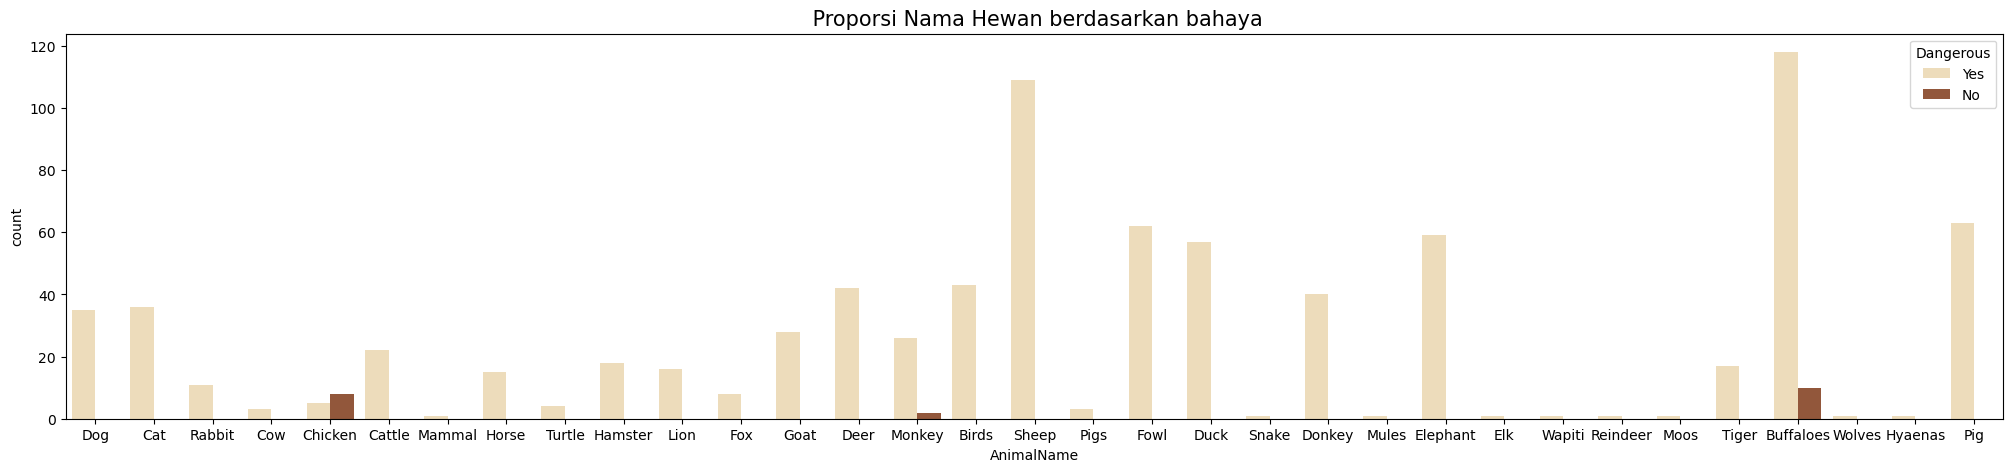

In [15]:
# Musliadi
#Proporsi nama hewan berdasarkan bahaya
colors = ['Wheat', 'Sienna'] 
plt.figure(figsize=(25,5))
sns.countplot(x='AnimalName', hue='Dangerous', data=datahewan, palette=colors)
plt.title(' Proporsi Nama Hewan berdasarkan bahaya', fontsize=15)
plt.show()

- Proporsi nama hewan dengan bahaya No lebih sedikit daripada Yes

'\nthe visualization(matrix) does not show any obvious pattern or cluster in the missing \nvalues, hence, we assume that our data is missing completely at random(MCAR)\n'

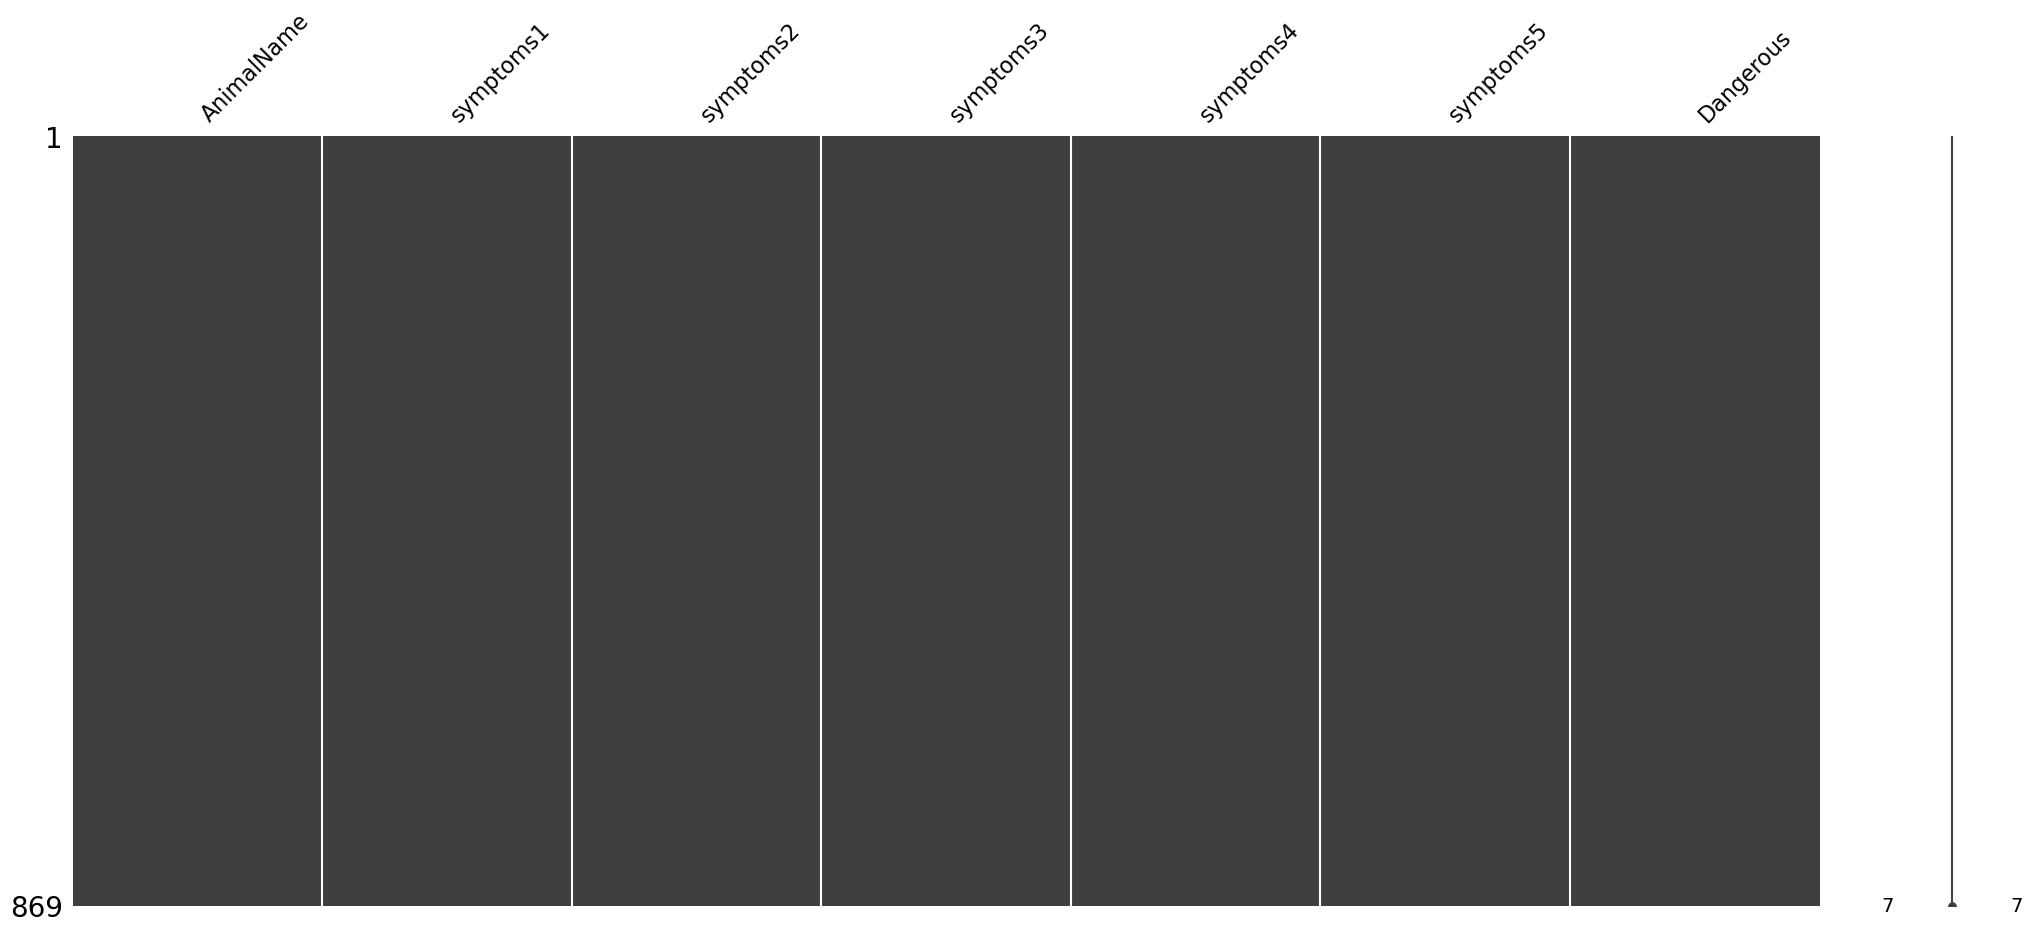

In [16]:
# visualisasi missing value
import missingno as msno
msno.matrix(datahewan);

'''
the visualization(matrix) does not show any obvious pattern or cluster in the missing 
values, hence, we assume that our data is missing completely at random(MCAR)
'''

- Tidak ada missing value pada visualisasi

In [17]:
# Musliadi
# mengubah nilai-nilai dalam kolom bertipe objek menjadi nilai numerik
from sklearn.preprocessing import LabelEncoder

for col in datahewan.columns : 
    if datahewan[col].dtypes =='object' : 
        enc  = LabelEncoder()
        enc.fit(datahewan[col].astype(str))
        datahewan[f'{col}_'] = enc.transform(datahewan[col].astype(str))
        datahewan.drop([col],axis=1, inplace=True) 

In [18]:
datahewan.columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']
datahewan

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,7,63,30,179,181,32,1
1,7,63,30,31,164,113,1
2,7,63,30,31,172,8,1
3,7,63,33,31,87,142,1
4,7,63,30,31,87,21,1
...,...,...,...,...,...,...,...
866,1,63,33,115,53,160,1
867,1,63,94,88,87,78,1
868,1,97,89,179,107,82,1
869,1,77,25,179,27,159,1


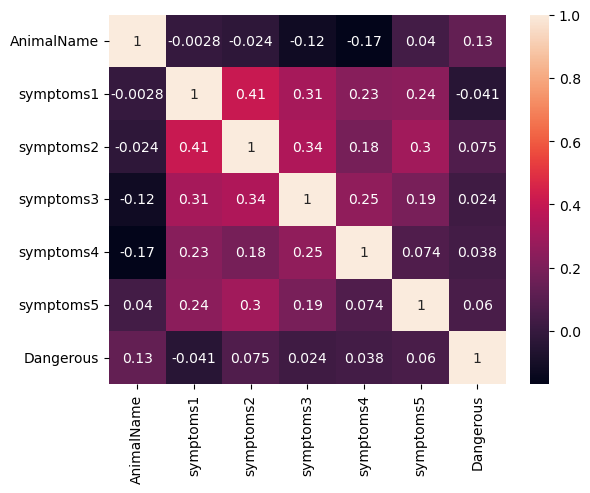

In [19]:
# Musliadi
# Menghitung korelasi
#visualisasi korelasi atribut
#Correlations Plot
correlations = datahewan.corr(method='pearson')
sns.heatmap(correlations, annot = True);

- Hanya fitur symptoms4 fitur memiliki korelasi yang kuat dengan symsptoms5 sehingga perlu di drop

In [20]:
# Musliadi
# Hapus kolom symptoms4
datahewan.drop(columns=['symptoms4'], inplace=True)

# CEK KELAS BALENCE ATAU TIDAK

1    849
0     20
Name: Dangerous, dtype: int64


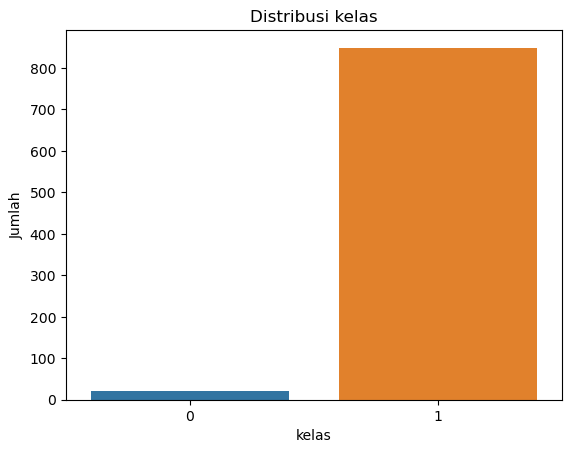

1    0.976985
0    0.023015
Name: Dangerous, dtype: float64


In [21]:
# Musliadi
# melakukan cek apakah data label belance atau tidak
class_distribution = datahewan['Dangerous'].value_counts()
print(class_distribution)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=datahewan, x='Dangerous')
plt.title('Distribusi kelas')
plt.xlabel('kelas')
plt.ylabel('Jumlah')
plt.show()

class_proportions = datahewan['Dangerous'].value_counts(normalize=True)
print(class_proportions)

- Dapat dilihat bahwa sanya data label tidak belance

# TEKNIK OVERSAMPLING MINORITY CLASS

In [22]:
# Musliadi
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = datahewan[(datahewan['Dangerous']== 1)] 
df_minority = datahewan[(datahewan['Dangerous']== 0)] 
#upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 850, # to match majority class
                                 random_state=0)  # reproducible results
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [23]:
#Musliadi
#Melihat sampel teratas yang terambil
df_upsampled.head(5)

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms5,Dangerous
612,1,112,30,221,167,0
615,1,35,96,145,80,0
184,4,44,29,103,70,0
187,4,58,84,40,100,0
187,4,58,84,40,100,0


In [24]:
# Musliadi
# mengganti nilai 0 dengan "No" dan nilai 1 dengan "Yes"
df_upsampled['Dangerous'] = df_upsampled['Dangerous'].replace({0: 'No', 1: 'Yes'})

In [25]:
#Mus
# melihat tipe data sekarang
df_upsampled.dtypes

AnimalName     int32
symptoms1      int32
symptoms2      int32
symptoms3      int32
symptoms5      int32
Dangerous     object
dtype: object

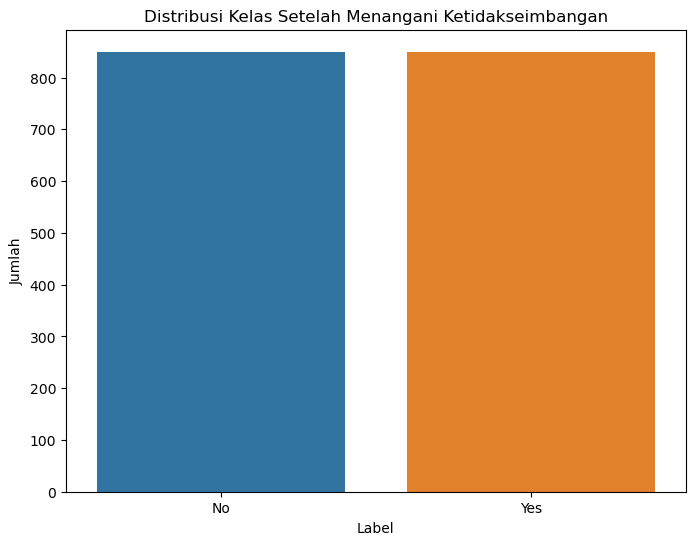

In [26]:
# Mus
# MELIHAT APAKAH SUDAH BELANCEE 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upsampled, x='Dangerous')
plt.title('Distribusi Kelas Setelah Menangani Ketidakseimbangan')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

- LABEL SUDAH MENJADI BELANCE

# MODELING

In [27]:
# MUS
# Membagi data x dan Y
X = df_upsampled.iloc[:,0:-1] # X is the features in our dataset
y = df_upsampled.iloc[:,-1]   # y is the Labels in our dataset

In [28]:
# Mus
# Melatih data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [29]:
# Musliadii
#membuat model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
parameter_grid_search = [
    {'n_estimators': [100,50], 'max_depth':[2,3,4,7,13,17]},
    {'n_estimators': [20, 50, 72, 100, 100], 'max_depth':[5,6]}
]

In [58]:
# Musliadii
# mencari parameter optimal berdasarkan metrik evaluasi 
metrics = ["accuracy", "f1_weighted"]
for metric in metrics:
    print("parameter optimal", metric)
    classifier = GridSearchCV(ExtraTreesClassifier(random_state=0),parameter_grid_search, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)
    
    print("hasil parameter terbaik", classifier.best_params_)
    
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))

parameter optimal accuracy
hasil parameter terbaik {'max_depth': 13, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.99      1.00      1.00       257

    accuracy                           0.99       261
   macro avg       1.00      0.75      0.83       261
weighted avg       0.99      0.99      0.99       261

parameter optimal f1_weighted
hasil parameter terbaik {'max_depth': 13, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.99      1.00      1.00       257

    accuracy                           0.99       261
   macro avg       1.00      0.75      0.83       261
weighted avg       0.99      0.99      0.99       261



- terlihat bahwa model yang dibangun dengan parameter optimal tersebut mencapai tingkat akurasi yang sempurna (1.00) untuk kedua kelas ('No' dan 'Yes'). Hal ini menunjukkan bahwa model mampu memprediksi kelas dengan sempurna berdasarkan fitur-fitur yang ada dalam dataset.

In [ ]:
# Musliadi
# mengevaluasi model menggunakan metrik evaluasi 
from sklearn.metrics import accuracy_score, confusion_matrix
for metric in metrics:
    print("Evaluasi untuk", metric)

classifier = GridSearchCV(ExtraTreesClassifier(random_state=0), parameter_grid_search, cv=5, scoring=metric)
classifier.fit(X_train, y_train)
print("Parameter terbaik:", classifier.best_params_)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Evaluasi untuk accuracy
Evaluasi untuk f1_weighted


- Akurasi yang terbentuk adalah 99,80%

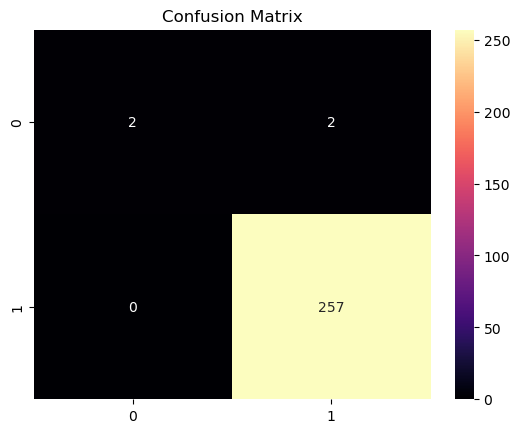

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='magma', fmt='d')
plt.title('Confusion Matrix')
plt.show()

- Angka 252 berarti bahwa ada 252 instance yang merupakan kelas 'No'  yang diprediksi dengan benar oleh model
- Angka 257 berarti bahwa ada 27 instance yang merupakan kelas 'Yes' yang diprediksi dengan benar oleh model

 # MEMBUAT VERSI LAIN

In [3]:
#MUSLIADII
#memanggil data dari direktori D
datahewan2 = pd.read_csv('D:/All Data I Have/datahewan.csv')
datahewan2

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [36]:
#Mussliadi
#Melihat tipe data 
datahewan2.dtypes

AnimalName    object
symptoms1     object
symptoms2     object
symptoms3     object
symptoms4     object
symptoms5     object
Dangerous     object
dtype: object

In [4]:
# Musliadi
# Data yang diatas ada NaN nya dihapus aja, mengingat cuma 2 baris
datahewan2.dropna(inplace = True, axis = 0)

In [5]:
# Musladi
# mengubah teks dalam kolom 'AnimalName'
# sehingga huruf pertama setiap kata menjadi huruf kapital dan huruf lain menjadi huruf kecil
datahewan2['AnimalName'] = datahewan2['AnimalName'].str.capitalize()

datahewan2['AnimalName'].replace({'Black-tailed deer':'Deer','White-tailed deer':'Deer','Mule deer':'Deer','Sika deer':'Deer',
                            'Other birds': 'Birds', 'Dogs': 'Dog', 'Fox ':'Fox', 'Goats': 'Goat'
                            
                            }, inplace = True)

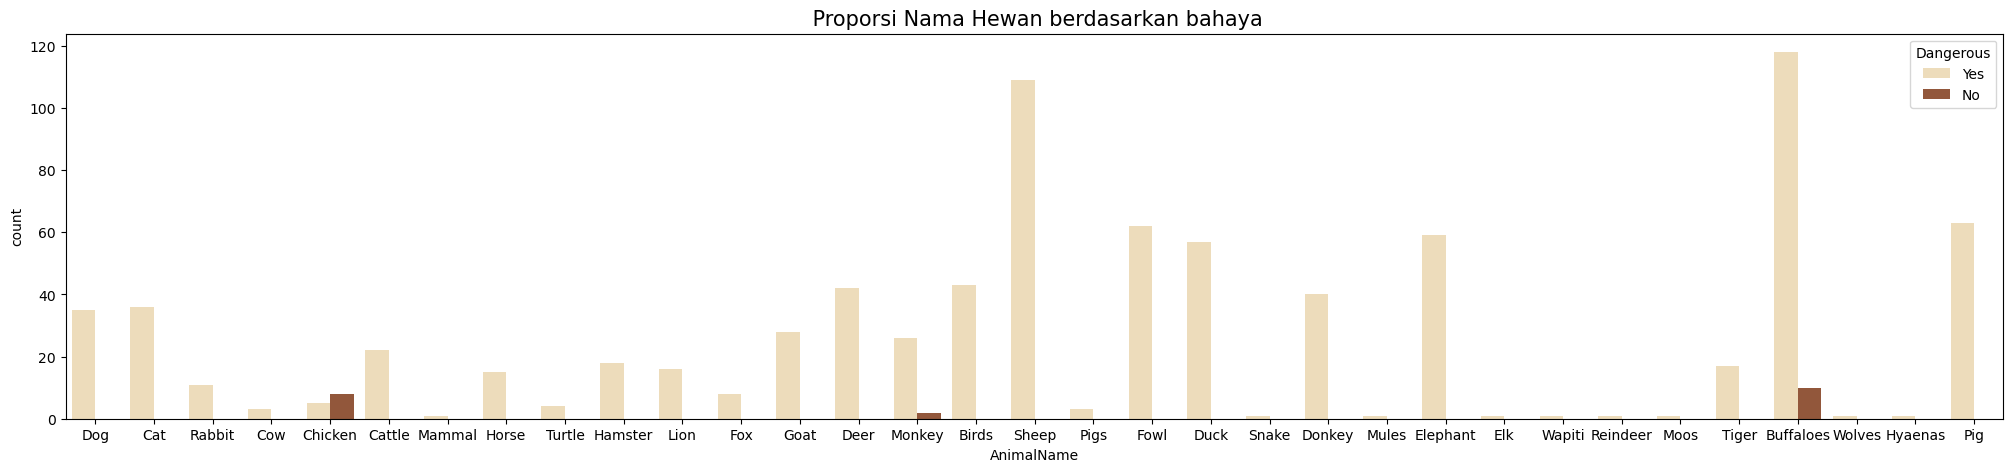

In [40]:
# Musliadi
#Proporsi nama hewan berdasarkan bahaya
colors = ['Wheat', 'Sienna'] 
plt.figure(figsize=(25,5))
sns.countplot(x='AnimalName', hue='Dangerous', data=datahewan2, palette=colors)
plt.title(' Proporsi Nama Hewan berdasarkan bahaya', fontsize=15)
plt.show()

In [6]:
# Musliadi
# mengubah nilai-nilai dalam kolom bertipe objek menjadi nilai numerik
from sklearn.preprocessing import LabelEncoder

for col in datahewan2.columns : 
    if datahewan2[col].dtypes =='object' : 
        enc  = LabelEncoder()
        enc.fit(datahewan2[col].astype(str))
        datahewan2[f'{col}_'] = enc.transform(datahewan2[col].astype(str))
        datahewan2.drop([col],axis=1, inplace=True) 

In [7]:
datahewan2.columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

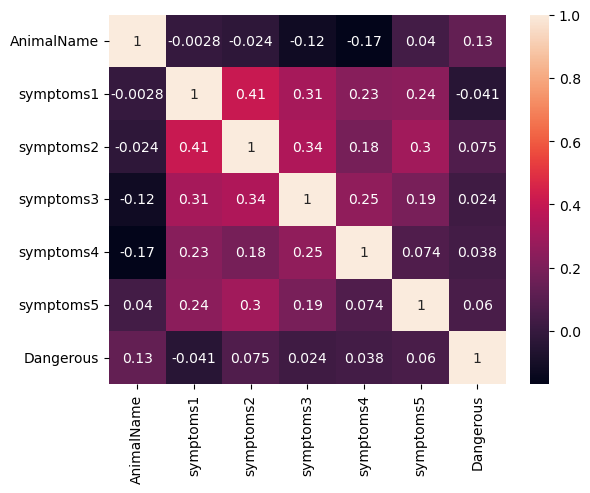

In [8]:
# Musliadi
# Menghitung korelasi
#visualisasi korelasi atribut
#Correlations Plot
correlations = datahewan2.corr(method='pearson')
sns.heatmap(correlations, annot = True);

- Hanya fitur symptoms4 fitur memiliki korelasi yang kuat dengan symsptoms5 sehingga perlu di drop

In [9]:
# Musliadi
# Hapus kolom symptoms4
datahewan2.drop(columns=['symptoms4'], inplace=True)

In [11]:
# mengganti nilai 0 dengan "No" dan nilai 1 dengan "Yes"
datahewan2['Dangerous'] = datahewan2['Dangerous'].replace({0: 'No', 1: 'Yes'})

In [13]:
datahewan2.dtypes

AnimalName     int32
symptoms1      int32
symptoms2      int32
symptoms3      int32
symptoms5      int32
Dangerous     object
dtype: object

In [15]:
X = datahewan2.iloc[:,0:-1] # X is the features in our dataset
y = datahewan2.iloc[:,-1]  

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
parameter_grid_search = [
    {'n_estimators': [100,50], 'max_depth':[2,3,4,7,13,17]},
    {'n_estimators': [20, 50, 72, 100, 100], 'max_depth':[5,6]}
]

In [18]:
# mencari parameter optimal berdasarkan metrik evaluasi 
metrics = ["accuracy", "f1_weighted"]
for metric in metrics:
    print("parameter optimal", metric)
    classifier = GridSearchCV(ExtraTreesClassifier(random_state=0),parameter_grid_search, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)
    
    print("hasil parameter terbaik", classifier.best_params_)
    
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))

parameter optimal accuracy
hasil parameter terbaik {'max_depth': 13, 'n_estimators': 100}
              precision    recall  f1-score   support

          No       1.00      0.50      0.67         4
         Yes       0.99      1.00      1.00       257

    accuracy                           0.99       261
   macro avg       1.00      0.75      0.83       261
weighted avg       0.99      0.99      0.99       261

parameter optimal f1_weighted
hasil parameter terbaik {'max_depth': 13, 'n_estimators': 100}
              precision    recall  f1-score   support

          No       1.00      0.50      0.67         4
         Yes       0.99      1.00      1.00       257

    accuracy                           0.99       261
   macro avg       1.00      0.75      0.83       261
weighted avg       0.99      0.99      0.99       261



- Akurasi yang terbentuk adalah 99,23%

- terlihat bahwa model yang dibangun dengan parameter optimal tersebut mencapai tingkat akurasi yang sempurna (1.00) untuk kelas 'No' dan (0.99) untuk kelas 'Yes'. Hal ini menunjukkan bahwa model mampu memprediksi kelas dengan hampir sempurna berdasarkan fitur-fitur yang ada dalam dataset.